In [8]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [54]:
%run ~/Dropbox/GNNpaper/posts/function_proposed_gcn.py

In [55]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [56]:
merged_df = pd.read_csv('./240403_meged.csv')
merged_df = merged_df[merged_df['model'] != 'WeightedEnsemble_L2']

In [57]:
merged_df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
0,ECOD,0.003704,0.591404,0.003553,0.843750,0.007076,0.717359,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
1,GMM,0.082634,0.692003,0.003410,0.609375,0.006782,0.650760,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
2,HBOS,0.002123,0.936368,0.020868,0.781250,0.040650,0.858943,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
3,IForest,0.144727,0.815358,0.007263,0.781250,0.014393,0.798334,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
4,INNE,0.326223,0.766636,0.005070,0.687500,0.010065,0.727136,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,LODA,1.380267,0.990775,0.000000,0.000000,0.000000,0.499843,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN
1644,LOF,1.171791,0.982414,0.001378,0.001345,0.001361,0.496291,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN
1645,MCD,0.101797,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN
1646,PCA,0.029553,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009000,500499,['amt'],0.009029,166834,0.008913,NaN,NaN,NaN


`-` 전체 데이터, train, test data의 비율이 비슷한 것 추출

In [18]:
condition1 = abs(merged_df['throw_rate'] - merged_df['train_frate']) <= 0.05
condition2 = abs(merged_df['throw_rate'] - merged_df['test_frate']) <= 0.05
filtered_df = merged_df[condition1 & condition2]

In [60]:
def plot_merged_df(merged_df):

    condition1 = abs(merged_df['throw_rate'] - merged_df['train_frate']) <= 0.05
    condition2 = abs(merged_df['throw_rate'] - merged_df['test_frate']) <= 0.05
    filtered_df = merged_df[condition1 & condition2]

    filtered_df = filtered_df.sort_values(by=['throw_rate', 'model', 'auc'], ascending=[True, True, False]) \
        .drop_duplicates(subset=['throw_rate', 'model'])

    fig, ax = plt.subplots()
    for model, group in filtered_df.groupby('model'):
        ax.plot(group['throw_rate'], group['auc'], label=model)
    ax.set_xlabel('Throw Rate')
    ax.set_ylabel('AUC')
    ax.set_xlim(0.01, 0.5)
    ax.set_ylim(0.85, 1)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()  

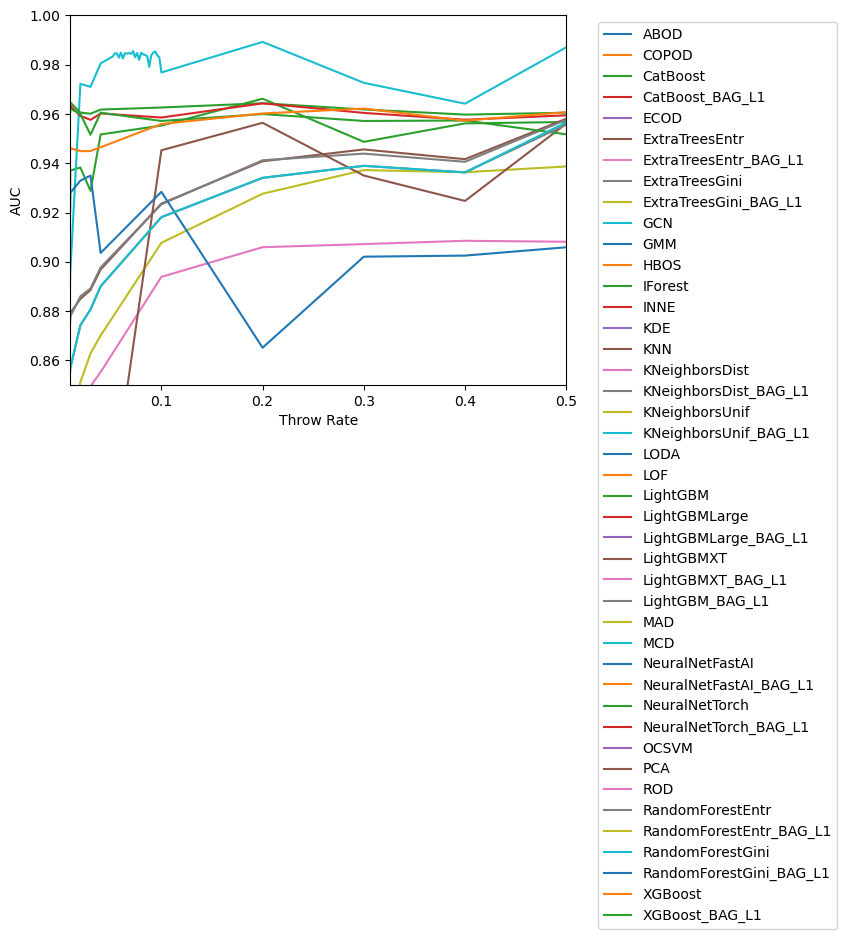

In [61]:
plot_merged_df(merged_df)


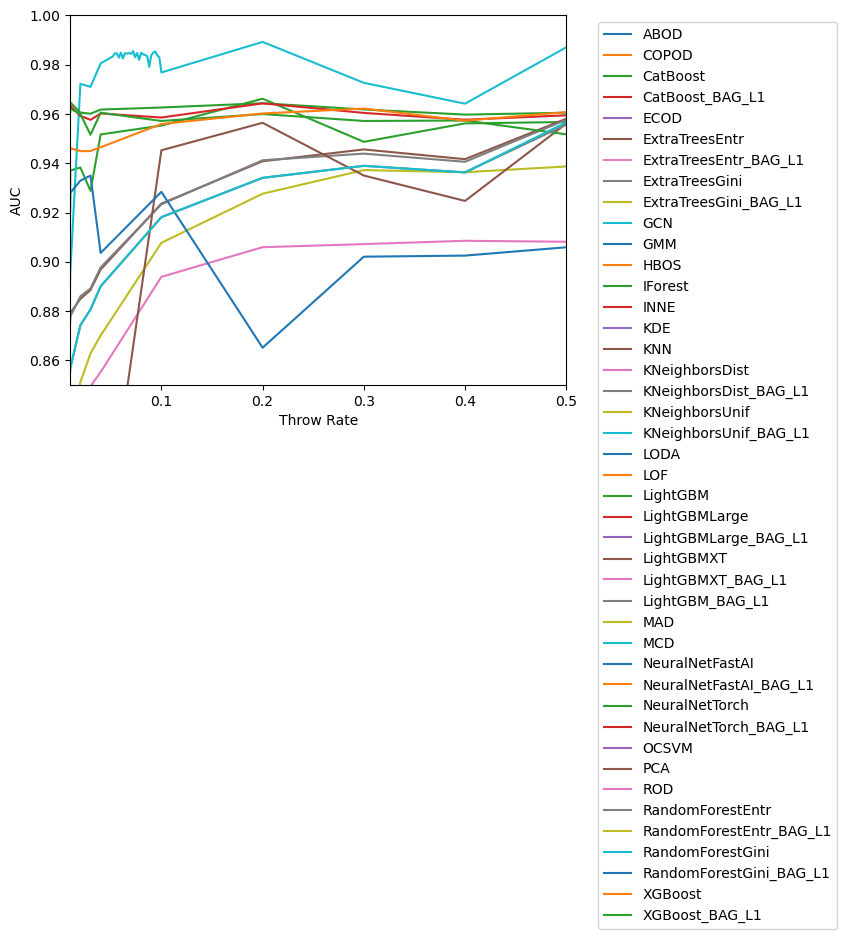

In [62]:
def plot_merged_df2(merged_df):

    condition1 = abs(merged_df['throw_rate'] - merged_df['train_frate']) <= 0.05
    condition2 = abs(merged_df['throw_rate'] - merged_df['test_frate']) <= 0.05
    filtered_df = merged_df[condition1 & condition2]


    filtered_df = filtered_df.sort_values(by=['throw_rate', 'model', 'auc'], ascending=[True, True, False]) \
        .drop_duplicates(subset=['throw_rate', 'model'])


    fig, ax = plt.subplots()
    for model, group in filtered_df.groupby('model'):
        ax.plot(group['throw_rate'], group['auc'], label=model)
        
    ax.set_xlabel('Throw Rate')
    ax.set_ylabel('AUC')
    ax.set_xlim(0.01, 0.5)
    ax.set_ylim(0.85, 1)
    

    handles, labels = ax.get_legend_handles_labels()
    unique_labels = set(labels)
    filtered_handles = [h for h, l in zip(handles, labels) if l in unique_labels]
    filtered_labels = [l for l in labels if l in unique_labels]
    
 
    ax.legend(filtered_handles, filtered_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()  
    plt.show()



plot_merged_df2(merged_df)


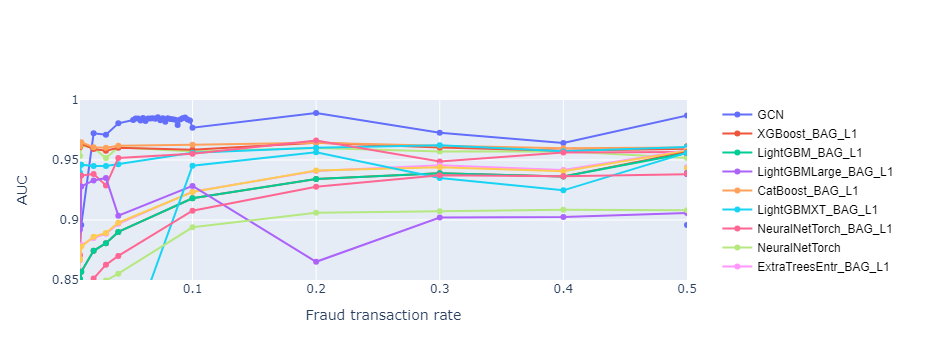

In [88]:
import plotly.graph_objects as go

def plot_merged_df3(merged_df):

    condition1 = abs(merged_df['throw_rate'] - merged_df['train_frate']) <= 0.05
    condition2 = abs(merged_df['throw_rate'] - merged_df['test_frate']) <= 0.05
    filtered_df = merged_df[condition1 & condition2]

    filtered_df = filtered_df.sort_values(by=['throw_rate', 'model', 'auc'], ascending=[True, True, False]) \
        .drop_duplicates(subset=['throw_rate', 'model'])

    label_order = filtered_df.groupby('model')['auc'].mean().sort_values(ascending=False).index

    fig = go.Figure()
    for model in label_order:
            group = filtered_df[filtered_df['model'] == model]
            fig.add_trace(go.Scatter(
                x=group['throw_rate'],
                y=group['auc'],
                mode='lines+markers',
                name=model
            ))

    fig.update_layout(
        xaxis_title='Fraud transaction rate',
        yaxis_title='AUC',
        xaxis=dict(range=[0.009, 0.5]),
        yaxis=dict(range=[0.85, 1]),
        legend=dict(
            x=1.05,
            y=1,
            traceorder='normal',
            font=dict(
                family='Arial',
                size=12,
                color='black'
            ),
           # bgcolor='LightSteelBlue',
         #   bordercolor='Black',
         #   borderwidth=1
        )
    )

    fig.show()


plot_merged_df3(merged_df)


In [93]:
merged_df[merged_df(['model']=='NeuralNetFastAI')]

TypeError: 'DataFrame' object is not callable

In [91]:
filtered_df[(filtered_df['model'] == 'GCN') & (filtered_df['gamma'] == 0.8 )]

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
233,GCN,NaN,0.954126,0.744539,0.523015,0.614420,0.976265,True,Proposed,0.070,64350,amt,0.070039,21450,0.069883,NaN,10000000.0,0.8
234,GCN,NaN,0.965907,0.796637,0.685262,0.736764,0.985523,True,Proposed,0.072,62562,amt,0.072792,20855,0.069624,NaN,10000000.0,0.8
235,GCN,NaN,0.964319,0.776786,0.711172,0.742532,0.983037,True,Proposed,0.074,60871,amt,0.074551,20291,0.072347,NaN,10000000.0,0.8
236,GCN,NaN,0.961583,0.753077,0.713306,0.732652,0.980843,True,Proposed,0.076,59269,amt,0.076735,19757,0.073797,NaN,10000000.0,0.8
237,GCN,NaN,0.958961,0.793586,0.641622,0.709559,0.981972,True,Proposed,0.078,57750,amt,0.077957,19250,0.078130,NaN,10000000.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,GCN,NaN,0.964436,0.781726,0.593830,0.674945,0.982910,True,Proposed,0.060,75075,amt,0.059274,25025,0.062178,NaN,10000000.0,0.8
1443,GCN,NaN,0.963333,0.759607,0.578625,0.656878,0.980229,True,Proposed,0.062,72653,amt,0.062448,24218,0.060657,NaN,10000000.0,0.8
1444,GCN,NaN,0.963514,0.811003,0.587026,0.681073,0.983955,True,Proposed,0.064,70383,amt,0.063211,23461,0.066365,NaN,10000000.0,0.8
1445,GCN,NaN,0.962637,0.764463,0.620805,0.685185,0.979923,True,Proposed,0.066,68250,amt,0.066168,22750,0.065495,NaN,10000000.0,0.8
